In [1]:
%run radiomorpho.py

In [2]:
dirs = ('101first_fit', '101nvss_fit')
files = transpose_mtx([get_file_list(dirs[i], 'fit') for i in range(len(dirs))])

In [3]:
%%time
sz = 12
dt = []
for im in files:
    try:
        dat = [np.append(get_open_close_info(readNormalizedImg(im[0]), sz), 
               get_open_close_info(readNormalizedImg(im[1]), sz))]
        dt.append(dat)
        pass
    except OSError:
        pass

CPU times: user 1min 23s, sys: 64 ms, total: 1min 23s
Wall time: 1min 23s


In [19]:
dt = np.array(dt)
from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
pca.fit(dt)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [20]:
Y = pca.transform(dt)
Y.shape

(100, 3)

<IPython.core.display.Javascript object>


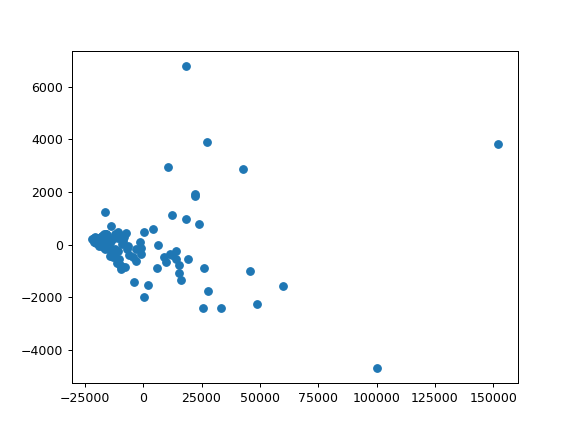

In [34]:
%matplotlib notebook
plt.scatter(Y[:,0], Y[:,1])